In [5]:
%matplotlib inline 
#para poder mostrar figuras integradas en el notebook
# figuras como las de los grafos

# Implementación de A*

En este notebook se realizará la implementación del algoritmo A\* que funcionará primeramente sobre un grafo y posteriormente sobre un mapa 2D (un tablero).
La implementación de A\* trabajará con nodos, así que será trivial adaptar el algoritmo para que realice búsquedas en otro tipo de problemas.
Para realizar dicha adaptación solo será necesario implementar nuevas funciones de sucesores, meta y heurístico. 
De hecho, la práctica utilizará el código de este notebook, razón por la que existen ciertas celdas que comienzan por # Cargar Celda

# Autores:
- **Rodrigo Díaz García**
- **Miguel Barriuso García**

```Python 

def AStar(inicial, sucesoresF, metaF, heuristicoF):
    '''
    Algoritmo A*. 
    Recibe:
    inicial: Nodo inicial
    sucesoresF: Función que toma un nodo y devuelve una lista de nodos sucesores (dependerá de cada problema).
    metaF: Función que toma un estado y devuelve True si es un estado meta (dependerá de cada problema)
    heuristicoF: Función que toma un estado y devuelve un valor númerico con la estimación del coste restante para llegar a una meta (dependerá de cada problema)
    
    Return: solución [estado1, estado2,..., estadoN] o [] si no hay solución
    '''
    
    '''
    creo abiertos y cerrados.
    abiertos se inicializa con el nodo inicial.
    cerrados estará vacía
    
    mientras abiertos no esté vacía:
        recupero de abiertos el nodo con menor f (nodoActual).
        guardo nodoActual en cerrados.
        compruebo si es meta:
            si lo es devuelve el camino
        obtengo los sucesores, la función genera sucesores recibe a la que calcula la h
        para suc en sucesores:
            si no está en abiertos ni en cerrados 
                lo meto en abiertos
            está en abiertos pero suc tiene menor f
                lo actualizo en abiertos
            esta en cerrados pero suc tiene menor f
                lo elimino de cerrados y lo meto en abiertos
    devuelvo [], no había solución
    '''
        
```       






_______

Implementa AStar

In [6]:
# Cargar Celda

def AStar(inicial, sucesoresF, metaF, heuristicoF):
    abiertos = Abiertos()
    cerrados = {}
    abiertos.put(inicial)
    while not abiertos.empty():
        nodoActual = abiertos.pop()
        cerrados[nodoActual[1].estado] = nodoActual[1]
        if metaF(nodoActual[1]):
            return nodoActual[1].camino()
        sucesores = sucesoresF(nodoActual[1], heuristicoF)
        for sucesor in sucesores:
            nodoAbierto = abiertos.getNodo(sucesor.estado)
            nodoCerrado = cerrados.get(sucesor.estado, None)
            if nodoAbierto is None and nodoCerrado is None:
                abiertos.put(sucesor)
            elif nodoAbierto is not None and sucesor.f < nodoActual[0]:
                abiertos.update(nodoAbierto, sucesor)
            elif nodoCerrado is not None and sucesor.f < nodoActual[0]:
                del cerrados[sucesor.estado]
                abiertos.put(sucesor)
    return []


## Implementaciones de Nodo y Abiertos

Versión del profesor de lo pedido en el notebook anterior.

In [7]:
# Cargar Celda

class Nodo:
    
    def __init__(self,estado,padre,g,f):
        self.estado=estado
        self.padre=padre
        self.g = g
        self.f = f
    def getPadre(self):
        return self.padre
    def getEstado(self):
        return self.estado
    def getG(self):
        return self.g
    def getF(self):
        return self.f
    
    def camino(self): 
        "Create a list of nodes from the root to this node."
        
        # quiero camino de nodos o camino de estados?
        # append(x.getEstado) o append(x)
        x = self
        result =  []
        while x:
            result.append(x.getEstado())
            x = x.getPadre()
        return list(reversed(result))
    
    def __repr__(self):
        return "Nodo "+str(self.estado)+"("+str(self.f)+")"
    
    def __lt__(self, other):
        return self.f<other.f
        

    def __eq__(self, other):
        
        return self.getEstado()==other.getEstado()
    

In [8]:
# Cargar Celda

import queue as queue

class Abiertos():
    def __init__(self):
        self.colaPrioridad = queue.PriorityQueue()
    
    def put(self,nodo):
        self.colaPrioridad.put((nodo.getF(),nodo))
    
    def pop(self):
        return self.colaPrioridad.get()
    
    def empty(self):
        return self.colaPrioridad.empty();
    
    def getNodo(self,estado):
        for elem in self.colaPrioridad.queue:
            if elem[1].getEstado()==estado:
                return elem[1]
        return None           
    
    def update(self,nodoViejo,nodoNuevo):
        self.colaPrioridad.queue.remove((nodoViejo.getF(),nodoViejo))
        self.colaPrioridad.put((nodoNuevo.getF(),nodoNuevo))
        
    def getNodes(self):
        return list(map(lambda x:x[1],self.colaPrioridad.queue))
    
    def __str__(self):
        return str(self.colaPrioridad.queue)

# El grafo de búsqueda

Para probar el algoritmo de A\* en un problema sencillo y con solución y traza conocida se va a crear un grafo como el de los apuntes de teoría usando la librería **networkx**. 

Básicamente el grafo se crea con nx.Graph(), con nx.DiGraph() le estoy diciendo que es dirigido.

Se crean nodos con **add_node** y se crean arcos con **add_edge**

los hijos del nodo 1 son:
[2, 3]


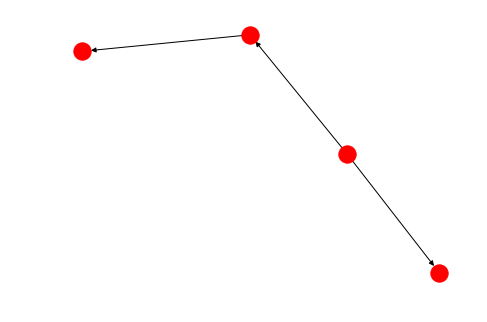

In [9]:
# ejemplo de grafo básico

import networkx as nx
import matplotlib.pyplot as plt

# Creo el grafo
Gprueba = nx.DiGraph()

# como argumento el nombre del nodo
Gprueba.add_node(1)    
Gprueba.add_node(2)    
Gprueba.add_node(3)    

# como argumento los nombres de los nodos que forman el arco
Gprueba.add_edge(1,2)
Gprueba.add_edge(1,3)
Gprueba.add_edge(2,4)

# consultar los hijos del nodo 1. 
# el grafo G funciona como un diccionario
print("los hijos del nodo 1 son:")
print(list(Gprueba[1].keys()))


nx.draw(Gprueba)

Sabiendo estos conceptos básicos de creación de grafos, se va a pasar a crear un grafo como el de los apuntes de teoría.

Grafo de las diapositivas de A*


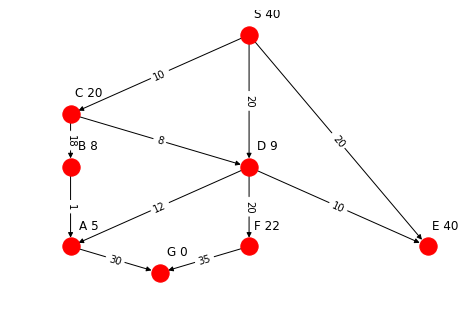

In [10]:
# Creo el grafo
Grafo = nx.DiGraph()

# este diccionario almacena los hijos que tiene cada padre
hijos = {'S': 'CDE','C': 'BD','B': 'A','D': 'AFE','A': 'G','F': 'G'}

# este diccionario almacena los costes de cada camino
costes={('S', 'C'):10, ('S', 'D'): 20, ('S', 'E'): 20, ('C', 'B'): 18,
        ('C', 'D'): 8, ('B', 'A'): 1, ('D', 'A'): 12, ('D', 'F'): 20,
        ('D', 'E'): 10, ('A', 'G'): 30, ('F', 'G'): 35}

# este diccionario almacena los valores heurísticos de cada estado.
heuristico = {'S': 40, 'C': 20, 'B': 8, 'D': 9, 'A': 5, 'F': 22, 'E': 40, 'G': 0}

# este diccionario almacena las posiciones de cada nodo, solo es estética
posiciones = {'S':(20,100),'C':(10,70),
              'B':(10,50),'D':(20,50),
              'A':(10,20),'F':(20,20),
              'E':(30,20),'G':(15,10)}

# crea el grafo, añade nodos y arcos
node_labels={}
for nodo in heuristico:
    Grafo.add_node(nodo)
    node_labels[nodo]=nodo+" "+str(heuristico[nodo])
    if nodo in hijos:
        for hijo in hijos[nodo]:
            Grafo.add_edge(nodo,hijo) 

#dibuja el grafo
nx.draw(Grafo,pos = posiciones)
#dibuja las etiquetas de los nodos y los arcos
node_label_pos = {k:[v[0]+1,v[1]+8] for k,v in posiciones.items()}
node_label_handles = nx.draw_networkx_labels(Grafo,pos = node_label_pos,labels = node_labels)
nx.draw_networkx_edge_labels(Grafo, pos = posiciones, edge_labels=costes)
print("Grafo de las diapositivas de A*")

# Funciones de sucesores, meta y heurística sobre el grafo

A continuación se pueden ver como serían las funciones de sucesores, meta y heurística para el problema de la búsqueda en el grafo.

- Para crear un nodo inicial se le pasa al constuctor de Nodo el estado inicial, su nodo padre que en el caso inicial sería None, el valor de G que es 0 y el valor de F que sería G+H, en el caso inicial como G es 0, solo haría falta H.

- sucesoresGrafo. Se obtienen los sucesores, como el grafo 'Grafo' es un diccionario solamente tenemos que consultar las claves disponibles. Se actualiza la G usando el coste necesario para llegar al hijo que se saca del diccionario de costes. Se calcula la H invocando a la función heuristicaF.

- metaGrafo. Solamente compara que el estado sea o no sea 'G' que es el valor del estado meta.
- heuristicaGrafo. Consulta en el diccionario de valores heurísticos.

In [11]:
nodoInicial = Nodo('S',None,0,heuristico['S'])

def sucesoresGrafo(nodo,heuristicaF):
    estado = nodo.getEstado()
    g = nodo.getG()
    hijos = []
    
    for hijo in Grafo[estado].keys():
        nuevaG = g+costes[(estado,hijo)]
        h=heuristicaF(hijo)
        
        hijos.append(Nodo(hijo,nodo,nuevaG,nuevaG+h))
        
    return hijos

def metaGrafo(nodo):
    estado = nodo.getEstado()
    return estado=='G' 

def heuristicaGrafo(estado):
    return heuristico[estado]                
    
print(heuristicaGrafo('S'))
print(metaGrafo(nodoInicial))
print(sucesoresGrafo(nodoInicial,heuristicaGrafo))
    


40
False
[Nodo C(30), Nodo D(29), Nodo E(60)]


In [12]:
AStar(nodoInicial,sucesoresGrafo, metaGrafo, heuristicaGrafo)

['S', 'C', 'B', 'A', 'G']

# Trazas más ricas

A la hora de depurar el algoritmo A\* es posible que las listas de abiertos y cerrados sean tan grandes que con un print no entendamos nada.

Se puede generar una tabla HTML con el resultado de una lista usando **pandas**, una librería de python para el tratamiento de tablas de datos que está incluida en Anaconda.




In [13]:
from IPython.display import display
import pandas as pd
import numpy as np

debugData =[]

columns = ["Actual","Abiertos", "Sucesores", "Cerrados"]
debugData.append(["Nodo actual",
                  str(list(range(1,20))),
                  str(["suc1","suc2","suc3"]),
                  str(list(range(1,20)))])

pd.DataFrame(np.array(debugData), columns=columns)
debugData.append(["Nodo actual",
                  str(list(range(1,20))),
                  str(["suc1","suc2","suc3"]),
                  str(list(range(1,20)))])
debugData.append(["Nodo actual",
                  str(list(range(1,20))),
                  str(["suc1","suc2","suc3"]),
                  str(list(range(1,20)))])

pd.DataFrame(np.array(debugData), columns=columns)
        

,Actual,Abiertos,Sucesores,Cerrados
0,Nodo actual,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['suc1', 'suc2', 'suc3']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Nodo actual,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['suc1', 'suc2', 'suc3']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,Nodo actual,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['suc1', 'suc2', 'suc3']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


# Ejemplo de path finding

En mismo código de A\* lo vamos a usar para resolver un problema de *path finding* (movernos del punto A al punto B en una matriz 2D)

### Explicación de la representación del mapa y los estados


El mapa va a ser una lista en 2D con 0s en las casillas libres y 1s en los obstaculos

Un estado van a ser coordenadas (y,x)
Una tupla (y,x).

In [21]:
# Cargar Celda

posiblesMovs = [[1,0],[-1,0],[0,1],[0,-1]]

def es_metaPF(nodo):
    global estadoFinalPF
    return nodo.estado == estadoFinalPF

def es_validaPF(estado):
    global tablero
    y, x = estado
    return y < len(tablero) and y >= 0 and x < len(tablero[0]) and x >= 0 and tablero[y][x] == 0

def heuristicaPF(estado):
    global estadoFinalPF
    y, x = estado
    y2, x2 = estadoFinalPF
    return abs(y - y2) + abs(x - x2)

def sucesoresPF(nodo,heuristicaF):
    global posiblesMovs
    hijos = []
    for mov in posiblesMovs:
        target = (nodo.estado[0] + mov[0], nodo.estado[1] + mov[1])
        if es_validaPF(target):
            hijos.append(Nodo(target, nodo, 1, heuristicaPF(target)))    
    return hijos

In [22]:
# Cargar Celda

tablero = [[1,1,1,1,1,1,1,1],
           [1,0,0,0,0,0,0,1],
           [1,0,1,1,0,0,0,1],
           [1,0,1,0,0,1,1,1],
           [1,1,1,0,1,0,0,1],
           [1,0,1,0,0,0,0,1],
           [1,1,1,1,1,1,1,1]]

estadoInicialPF = (1,1) #y,x
estadoFinalPF = (5,6)

def creaNodoInicialPF(ei,ef, tab, hPF):
    global estadoFinalPF
    global tablero
    
    estadoFinalPF = ef 
    tablero = tab
    
    return Nodo(ei,None,0,hPF(ei))
    
    

nodoInicialPF = creaNodoInicialPF(estadoInicialPF,estadoFinalPF, tablero, heuristicaPF)

AStar(nodoInicialPF, sucesoresPF, es_metaPF, heuristicaPF)

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 4),
 (3, 4),
 (3, 3),
 (4, 3),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6)]